In [74]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("ObesityDataSet2.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,Female,21,1.74,130.93,yes,yes,3.00,3.00,Sometimes,no,1.85,no,1.46,0.962,Sometimes,Public_Transportation,Obesity_Type_III
1052,Female,17,1.54,57.26,no,yes,1.97,2.34,Sometimes,no,1.71,yes,0.10,1.191,Sometimes,Public_Transportation,Overweight_Level_I
1053,Female,19,1.60,45.00,no,no,3.00,3.00,no,no,3.00,yes,2.00,0.000,no,Walking,Insufficient_Weight
1054,Female,25,1.69,113.45,yes,yes,3.00,3.00,Sometimes,no,2.99,no,0.39,0.284,Sometimes,Public_Transportation,Obesity_Type_III


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

In [77]:
sum_null = df.isnull().sum()
sum_null

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [78]:
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          994 non-null    object 
 1   Age                             994 non-null    object 
 2   Height                          994 non-null    float64
 3   Weight                          994 non-null    float64
 4   family_history_with_overweight  994 non-null    object 
 5   FAVC                            994 non-null    object 
 6   FCVC                            994 non-null    float64
 7   NCP                             994 non-null    float64
 8   CAEC                            994 non-null    object 
 9   SMOKE                           994 non-null    object 
 10  CH2O                            994 non-null    float64
 11  SCC                             994 non-null    object 
 12  FAF                             994 non-

In [ ]:
print(df_clean['Age'].unique())

['24' '23' '21' '22' '26' '18' '25' '20' '32' '19' '38' '34' '44'
 '22 years' '17 years' '17' '41' '29' '31' '39' '27' '16' '25 years' '40'
 '21 years' '33' '30' '37' '35' '36' '15' '19 years' '28' '55' '46'
 '36 years' '26 years' '42' '33 years' '43' '51' '45' '48' '23 years']


In [93]:
df_clean['Age'] = df_clean['Age'].astype(str).str.extract(r'(\d+)')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')   

print(df_clean['Age'].unique())

[24 23 21 22 26 18 25 20 32 19 38 34 44 17 41 29 31 39 27 16 40 33 30 37
 35 36 15 28 55 46 42 43 51 45 48]


C:\Users\Komang Gayatri\AppData\Local\Temp\ipykernel_14820\4142024637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = df_clean['Age'].astype(str).str.extract(r'(\d+)')
C:\Users\Komang Gayatri\AppData\Local\Temp\ipykernel_14820\4142024637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')


In [94]:
X = df_clean.drop('NObeyesdad', axis=1)
y = df_clean['NObeyesdad']

In [95]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical : ", categorical_features)
print("numerical : ", numerical_features)

Categorical :  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical :  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [ ]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
])


In [ ]:
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

d:\Univ\Semester 4\Model Deployment\environments\deep_learning\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:06:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC',
                                                   'MTRANS'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callback...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

=== Random Forest ===
Accuracy: 0.9195979899497487
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        26
      Normal_Weight       0.77      0.89      0.83        27
     Obesity_Type_I       1.00      0.88      0.94        33
    Obesity_Type_II       0.97      1.00      0.98        29
   Obesity_Type_III       1.00      0.97      0.98        30
 Overweight_Level_I       0.92      0.81      0.86        27
Overweight_Level_II       0.81      0.93      0.86        27

           accuracy                           0.92       199
          macro avg       0.92      0.92      0.92       199
       weighted avg       0.93      0.92      0.92       199



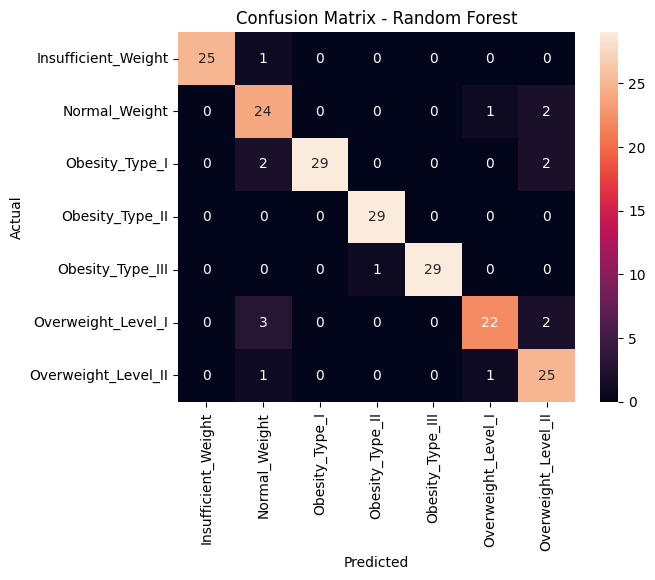

=== XGBoost ===
Accuracy: 0.9396984924623115
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.94        26
      Normal_Weight       0.92      0.89      0.91        27
     Obesity_Type_I       0.97      0.97      0.97        33
    Obesity_Type_II       0.97      1.00      0.98        29
   Obesity_Type_III       1.00      0.97      0.98        30
 Overweight_Level_I       0.83      0.93      0.88        27
Overweight_Level_II       0.96      0.85      0.90        27

           accuracy                           0.94       199
          macro avg       0.94      0.94      0.94       199
       weighted avg       0.94      0.94      0.94       199



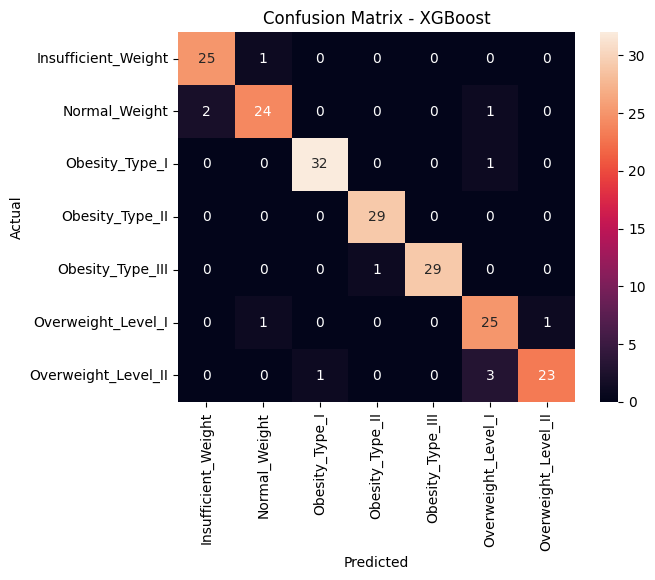

In [ ]:
def evaluate(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate(rf_pipeline, X_test, y_test, name="Random Forest")
evaluate(xgb_pipeline, X_test, y_test, name="XGBoost")


In [103]:
import joblib
joblib.dump(xgb_pipeline, "best_model.pkl")

joblib.dump(le_target, "label_encoder.pkl")

['label_encoder.pkl']

In [104]:
model = joblib.load("best_model.pkl")
le_target = joblib.load("label_encoder.pkl")

In [ ]:
new_data = {
    "Gender": "Female",
    "Age": 23,
    "Height": 1.61,
    "Weight": 82.64,
    "family_history_with_overweight": "yes",
    "FAVC": "yes",
    "FCVC": 2.96,
    "NCP": 1.0,
    "CAEC": "Sometimes",
    "SMOKE": "no",
    "CH2O": 2.98,
    "SCC": "no",
    "FAF": 0.74,
    "TUE": 2.0,
    "CALC": "Sometimes",
    "MTRANS": "Public_Transportation"
}

new_df = pd.DataFrame([new_data])


In [ ]:
predicted_class_idx = model.predict(new_df)[0]

predicted_label = le_target.inverse_transform([predicted_class_idx])[0]

print("Predicted Obesity Class:", predicted_label)


Predicted Obesity Class: Obesity_Type_I
